## Overfitting and Underfitting: The Goldilocks Zone of Modeling

## 💡 Real-Life Analogy:
### Imagine you're fitting a curve to a customer satisfaction pattern:

#### Underfitting: A straight line doesn't capture happy/sad periods.

#### Overfitting: A zig-zaggy curve fits every review score but generalizes poorly.



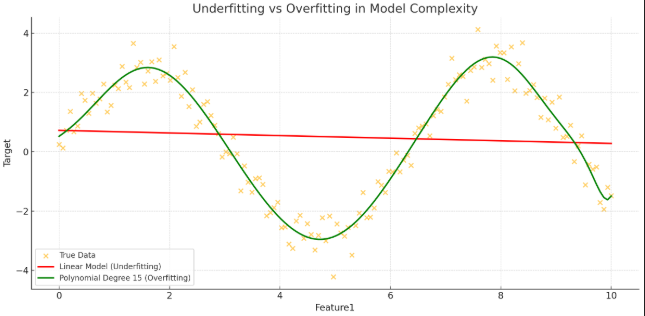

## 🔍 What You See in the Chart
#### 🔵 Dots: Real-world data points (from a wavy sine-like pattern)

#### 🔴 Red Line: A Linear Model — it’s too simple → Underfitting

#### 🟢 Green Line: A Polynomial Model (degree 15) — fits every wiggle → Overfitting

## 🧠 Insights

| Model Type         | Behavior                        | Problem             | Real-Life Analogy                                      |
| ------------------ | ------------------------------- | ------------------- | ------------------------------------------------------ |
| **Underfitting**   | Misses important trends         | High bias           | Like using a straight line to explain mood swings      |
| **Overfitting**    | Follows every noise in the data | High variance       | Like tailoring a suit too tight — fits one person only |
| **Balanced Model** | (Try degree 3–5)                | Best generalization | Like wearing clothes tailored but flexible             |


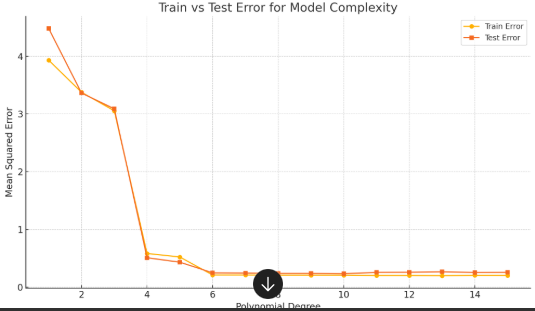

## 🔍 Interpretation of the Plot
#### 📉 Train Error decreases steadily as model complexity increases — more flexibility = better fit on training data.

#### 📈 Test Error drops initially, then rises after a point — classic overfitting curve.

| Degree Range     | Behavior                     | Interpretation                       |
| ---------------- | ---------------------------- | ------------------------------------ |
| 1–2              | High error on both sets      | **Underfitting** (too simple)        |
| 3–5 (Goldilocks) | Low test error, stable train | **Just right** (good generalization) |
| >7               | Test error rises             | **Overfitting** (too complex)        |


#### This is the essence of bias-variance tradeoff — we want a model that is not too simple, not too complex, but just right.

## ✅ Python Code: Underfitting vs Overfitting (with Comments)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [10]:

# Simulate real-life data: sin curve + noise (non-linear pattern)
np.random.seed(42)
X = np.linspace(0, 10, 150).reshape(-1, 1)
y = 3 * np.sin(X).ravel() + np.random.normal(0, 0.5, size=150)

In [5]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

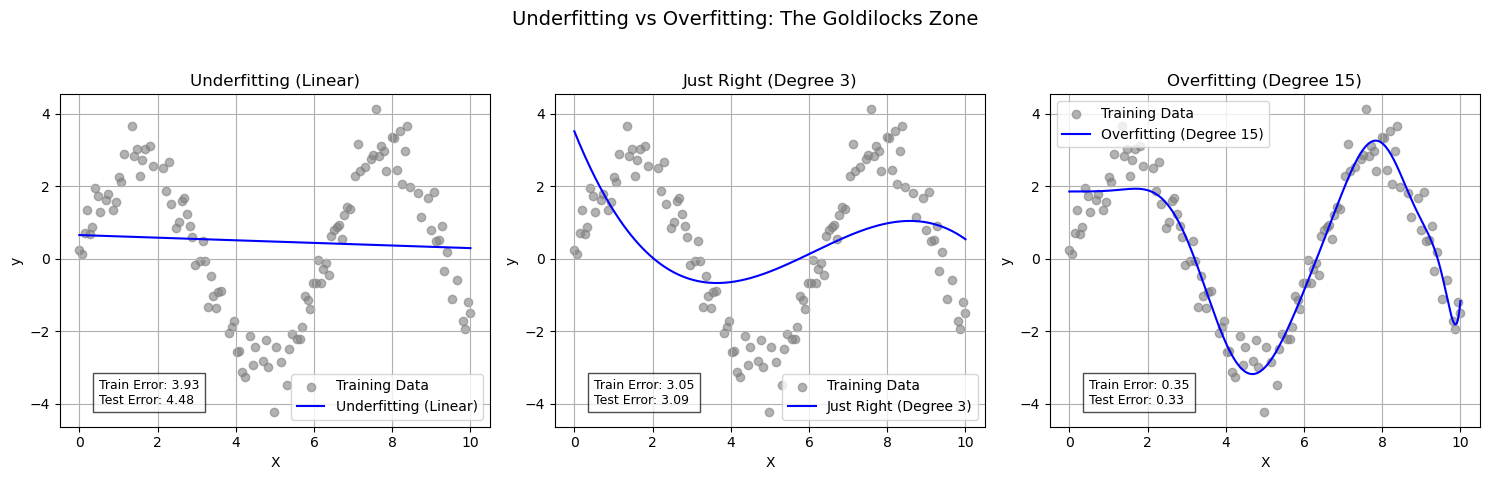

In [2]:


# Define 3 models: Underfit (degree 1), Goldilocks (degree 3), Overfit (degree 15)
models = {
    "Underfitting (Linear)": make_pipeline(PolynomialFeatures(1), LinearRegression()),
    "Just Right (Degree 3)": make_pipeline(PolynomialFeatures(3), LinearRegression()),
    "Overfitting (Degree 15)": make_pipeline(PolynomialFeatures(15), LinearRegression())
}

# Plot each model’s performance
plt.figure(figsize=(15, 5))
x_range = np.linspace(0, 10, 300).reshape(-1, 1)

for i, (label, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(x_range)
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))

    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color="gray", label="Training Data", alpha=0.6)
    plt.plot(x_range, y_pred, color="blue", label=label)
    plt.title(label)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.text(0.5, -4, f"Train Error: {train_error:.2f}\nTest Error: {test_error:.2f}", 
             fontsize=9, bbox=dict(facecolor='white', alpha=0.7))

plt.suptitle("Underfitting vs Overfitting: The Goldilocks Zone", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
